In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pyBrainNetSim.models.world as world
import pyBrainNetSim.generators.random as rnd
import pyBrainNetSim.drawing.viewers as vis
import pyBrainNetSim.simulation.evolution as evo
mpl.rcParams['figure.figsize'] = (15, 5)

In [10]:
my_environment = world.Environment(origin=(-10, -10), max_point=(10, 10), field_permeability=1.)
food = world.Attractor(environment=my_environment, position=(3, 3), strength=10.)  # add "food"
sm_prop_dist = rnd.SensorMoverPropertyDistribution()  # default set of distributions of the different variables in the mouse
smp = evo.SensorMoverPopulation(my_environment, sm_prop_dist, initial_population_size=10)
smp.sim_time_steps(max_iter=5)

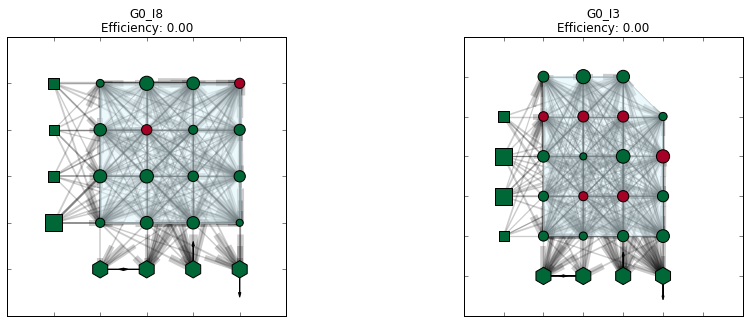

In [11]:
axs = smp.draw_top_networkx(top=2)

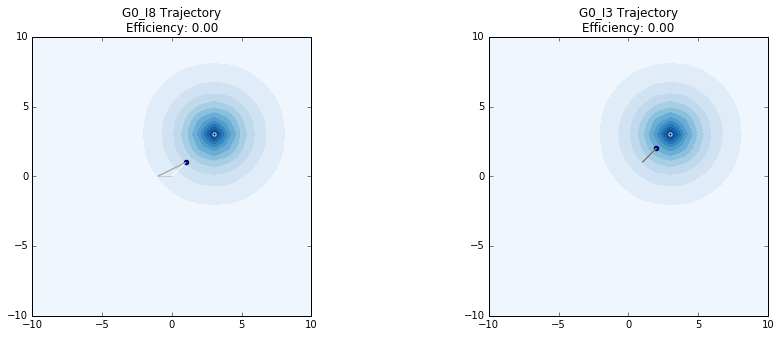

In [12]:
axs2 = smp.draw_top_trajectories(top=2)

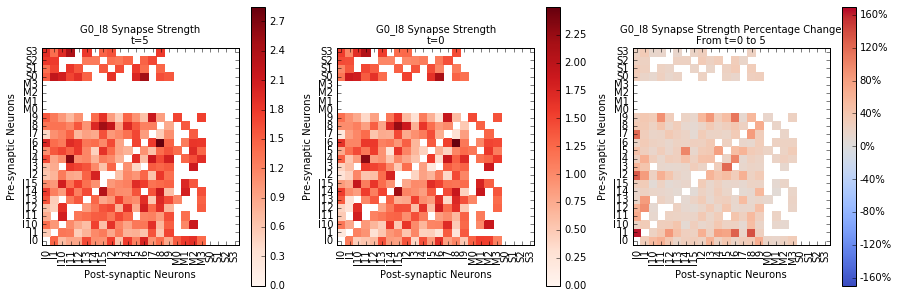

In [13]:
top_individual = smp.individuals[smp.top_efficiencies(top=1, at_time=-1)[0]]  # get top individual at the current time (-1)
f, axarr = plt.subplots(1,3)
_ax = vis.pcolormesh_edges(top_individual, at_time=-1, ax=axarr[0])
_ax = vis.pcolormesh_edges(top_individual, at_time=0, ax=axarr[1])
_ax = vis.pcolormesh_edge_changes(top_individual, initial_time=0, final_time=-1, as_pct=True, ax=axarr[2])